# Regresión Polínomial - Artículo 1

## 2.1 Fundamentos de la técnica

### La Regresión Polinomial es una forma de Regresión Lineal en la que la relación entre la variable independiente ($X$) y la variable dependiente ($Y$) se modela como un polinomio de enésimo grado. Se utiliza cuando la relación entre las variables es no lineal o curvilínea, lo que significa que una línea recta simple no puede modelar el comportamiento de los datos de manera precisa.
### Para ello, se introduce una transformación de los datos que incluye potencias de la variable independiente (como $X_2$, $X_3$, etc.) para permitir que la línea de ajuste se curve.

![Polynomial regression work](https://miro.medium.com/v2/1*QKcwvXU0UZ9YtkmRNKBM3w.gif)

[Figure 1. Polynomial regression](https://medium.com/@Hassane_01/polynomial-regression-in-machine-learning-understanding-the-process-6b10989b6c8c)

## 2.2 Modelo Matemático de la técnica

$$y = B_0 + B_1x + B_2x^2 + ... + B_nx^n + ϵ $$
Donde:
- $y$ es la variable dependiente.
- $x$ es la variable independiente.
- $B_0$, $B_1$, ... , $B_n$ son los coeficientes del modelo.
- $ϵ$ es el error del modelo.

## 2.3 Descripción de la librería, clases, funciones y sus parámetros

### Importar Librerías

Esta sección importa todas las librerías necesarias para la tarea de regresión polinomial.

- `pandas` se utiliza para el manejo de datos (aunque no se usa directamente para cargar datos en este ejemplo, es una buena práctica incluirlo).
- `numpy` se utiliza para operaciones numéricas, especialmente para crear los datos de ejemplo.
- `matplotlib.pyplot` y `seaborn` son para trazar y visualizar los datos y los resultados de la regresión.
- `warnings` se utiliza para ignorar cualquier advertencia que pueda aparecer durante la ejecución.
- De `sklearn`, importamos módulos para la selección de modelos (`GridSearchCV`, `train_test_split`), construcción de modelos (`Pipeline`, `LinearRegression`, `PolynomialFeatures`) y métricas de evaluación (`mean_squared_error`, `r2_score`).

## 2.4 Pipeline

### Import libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Preprocessing

### Feature Engineering

In [12]:
X = np.arange(0, 40)
y = [1, 4, 5, 7, 8, 6, 9, 10, 10, 23, 25, 44, 50, 63, 67, 64, 62, 70, 75, 88, 90, 92, 95, 100, 108, 135, 151, 160, 169, 172,173,176,175,175,176,178,179,180,190,201]
# First, let's plot the original data to see the relationship between X and y

El gráfico de dispersión visualiza la relación entre `X` e `y` para ayudar a comprender los datos y confirmar el patrón no lineal, lo que sugiere que la regresión polinomial es un enfoque adecuado.

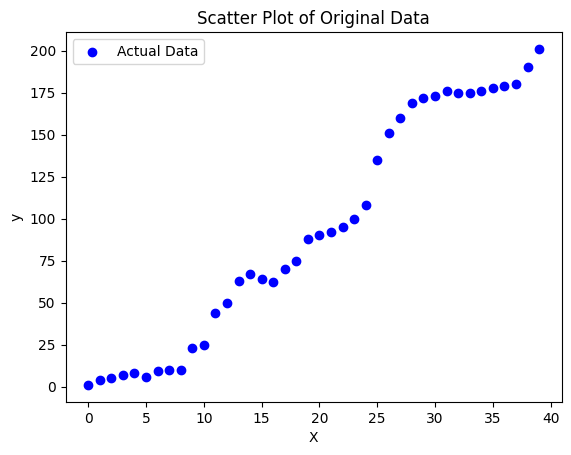

In [13]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of Original Data')
plt.legend()
plt.show()

### Model Selection

In [14]:
# Setting up a pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

### Model Training

Aquí es donde el modelo de regresión polinomial aprende de los datos. Dividimos los datos en dos partes: una para "entrenar" el modelo y otra para "probar" qué tan bien funciona. Luego, el modelo ajusta sus parámetros para encontrar la mejor curva que se adapte a los datos de entrenamiento.

In [15]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Parameters for grid search

parameters = {'poly__degree': np.arange(1, 5)}

grid_search = GridSearchCV(pipeline, parameters, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1,1), y_train)

best_degree = grid_search.best_params_['poly__degree']


poly_best = PolynomialFeatures(degree=best_degree)
X_poly_train_best = poly_best.fit_transform(X_train.reshape(-1,1))
X_poly_test_best = poly_best.transform(X_test.reshape(-1,1))

model_best = LinearRegression()
model_best.fit(X_poly_train_best, y_train)

LinearRegression()

### Prediction

`model_best.predict()` se utiliza para hacer predicciones tanto en los datos de entrenamiento transformados (`X_poly_train_best`) como en los datos de prueba transformados (`X_poly_test_best`). Estas predicciones se utilizarán para evaluar el rendimiento del modelo.

In [17]:
# Making predictions with the best model
predictions_train = model_best.predict(X_poly_train_best)
predictions_test = model_best.predict(X_poly_test_best)

### Model Evaluation


- `mean_squared_error` calcula la diferencia cuadrada promedio entre los valores reales y predichos tanto para los conjuntos de entrenamiento como de prueba. Valores más bajos indican un mejor ajuste del modelo.
- `r2_score` calcula el coeficiente de determinación ($R^2$), que representa la proporción de la varianza en la variable dependiente que es predecible a partir de la(s) variable(s) independiente(s). Un valor de $R^2$ más cercano a 1 indica un mejor ajuste.
- La salida muestra el `best_degree` encontrado por la búsqueda en cuadrícula y los valores calculados de `train_error`, `test_error`, `train_accuracy` ($R^2$ para los datos de entrenamiento) y `test_accuracy` ($R^2$ para los datos de prueba).

In [18]:
# Evaluating the model
train_error = mean_squared_error(y_train, predictions_train)
test_error = mean_squared_error(y_test, predictions_test)
train_accuracy = r2_score(y_train, predictions_train)
test_accuracy = r2_score(y_test, predictions_test)


best_degree, train_error, test_error, train_accuracy, test_accuracy

(np.int64(3),
 82.12057919191898,
 93.19555930834686,
 0.9833308707514882,
 0.9716276725394738)

## References:
- Hassane Skrikri. (2024). Polynomial regression in Machine Learning : Understanding the Process. Medium. Retrieved on Oct 8, 2025. https://medium.com/@Hassane_01/polynomial-regression-in-machine-learning-understanding-the-process-6b10989b6c8c